# K-Nearest Neighbor

TODO: def

### Importing the dataset

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

sns.set_style("whitegrid")

In [23]:
dataset = pd.read_csv('./filez/Social_Network_Ads.csv')
dataset.head(10)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

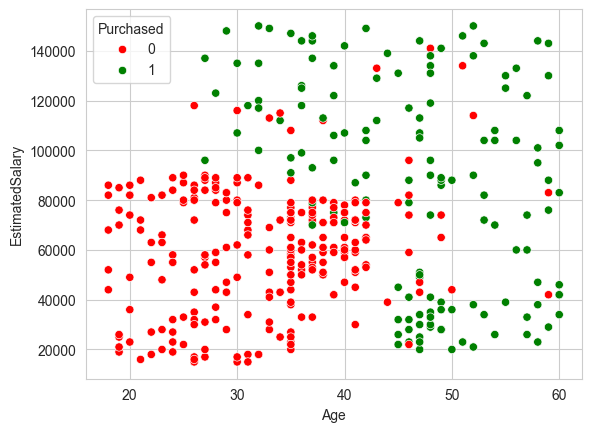

In [25]:
sns.scatterplot(dataset, x='Age', y='EstimatedSalary', hue='Purchased', palette={0: "red", 1: "green"})

### Splitting the dataset into the Train/Test set

In [26]:
from sklearn.model_selection import train_test_split

X = dataset.drop("Purchased", axis=1)
y = dataset["Purchased"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Training the K-NN model on the Training set

In [28]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

### Predicting a new result

In [29]:
new_data = pd.DataFrame([[32, 150000]], columns=['Age', 'EstimatedSalary'])
new_pred = classifier.predict(sc.transform(new_data))
print(f"new prediction: {new_pred[0]}")


new prediction: 1


### Visualizing predictions on Test set

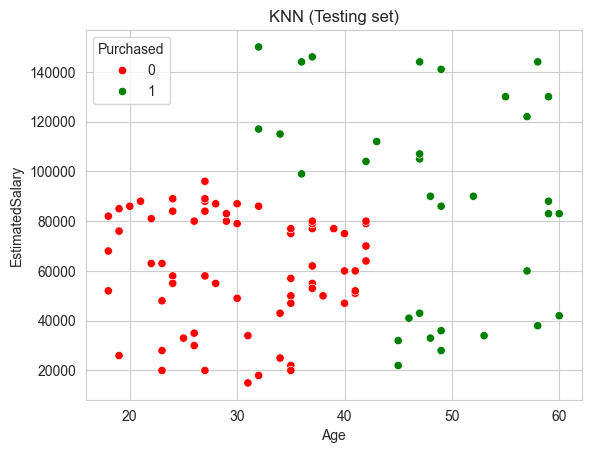

In [30]:
# Reverse the scaling of the test set
X_test_inv = sc.inverse_transform(X_test)

# Convert the scaled test set back to a DataFrame
X_test_inv_df = pd.DataFrame(X_test_inv, columns=["Age", "EstimatedSalary"])

# Add the predictions to this DataFrame
y_pred = classifier.predict(X_test)
X_test_inv_df["Purchased"] = y_pred

# Show the scatter plot
sns.scatterplot(
    data=X_test_inv_df,
    x="Age",
    y="EstimatedSalary",
    hue="Purchased",
    palette={0: "red", 1: "green"},
)
plt.title("KNN (Testing set)")
plt.show()

### Visualizing predictions on Test set with decision boundary

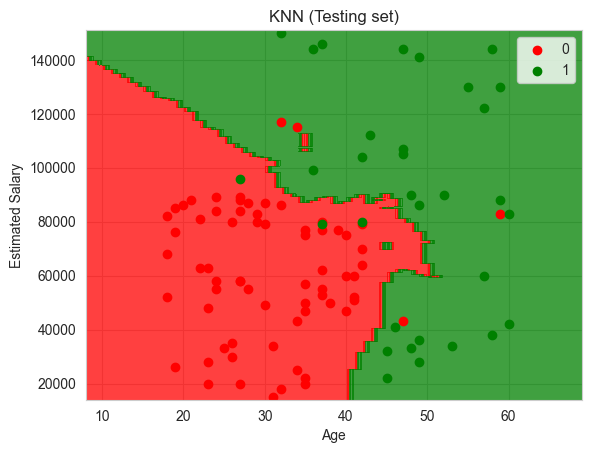

In [31]:
# Convert X_test back to a DataFrame with column names if it's not already
X_test_df = pd.DataFrame(X_test, columns=["Age", "EstimatedSalary"])

# Reverse the scaling of the test set
X_set, y_set = sc.inverse_transform(X_test_df), y_test

# Create the meshgrid
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=1),
    np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=1),
)

# Prepare the meshgrid as DataFrame for transformation
mesh_df = pd.DataFrame(
    np.c_[X1.ravel(), X2.ravel()], columns=["Age", "EstimatedSalary"]
)

# Predict on the transformed meshgrid
Z = classifier.predict(sc.transform(mesh_df)).reshape(X1.shape)

# Plot the decision regions
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(("red", "green")))

# Define colors for each class
colors = ["red", "green"]

# Scatter plot of the actual test data
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color=colors[i], label=j)

plt.title("KNN (Testing set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

### Evaluating the Model

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(f"1) classification_report:\n\n", classification_report(y_test, y_pred))
print(f"2) confusion_matrix:\n\n", confusion_matrix(y_test, y_pred), "\n")
print(f"3) accuracy_score:\n\n", accuracy_score(y_test, y_pred))

1) classification_report:

               precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100

2) confusion_matrix:

 [[64  4]
 [ 3 29]] 

3) accuracy_score:

 0.93


### 